In [1]:
from keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
 "bird_classification\\train",
    image_size=(224, 224),
    batch_size=32)
test_dataset = image_dataset_from_directory(
   "bird_classification\\test",
    image_size=(224, 224),
    batch_size=32)
validata = image_dataset_from_directory(
   "bird_classification\\valid",
    image_size=(224, 224),
    batch_size=32)


Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [2]:
import numpy as np
class_names = train_dataset.class_names
np.shape(class_names)

(525,)

In [3]:
class_names[:10]

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS']

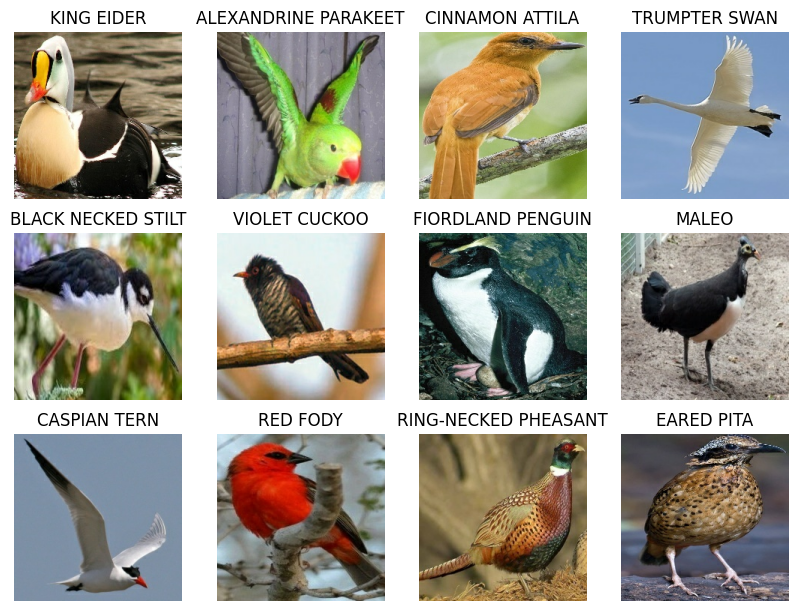

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images,labels in train_dataset.take(1):
    for i in range(12):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [5]:
from tensorflow import keras
from keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.4),
    ]
)

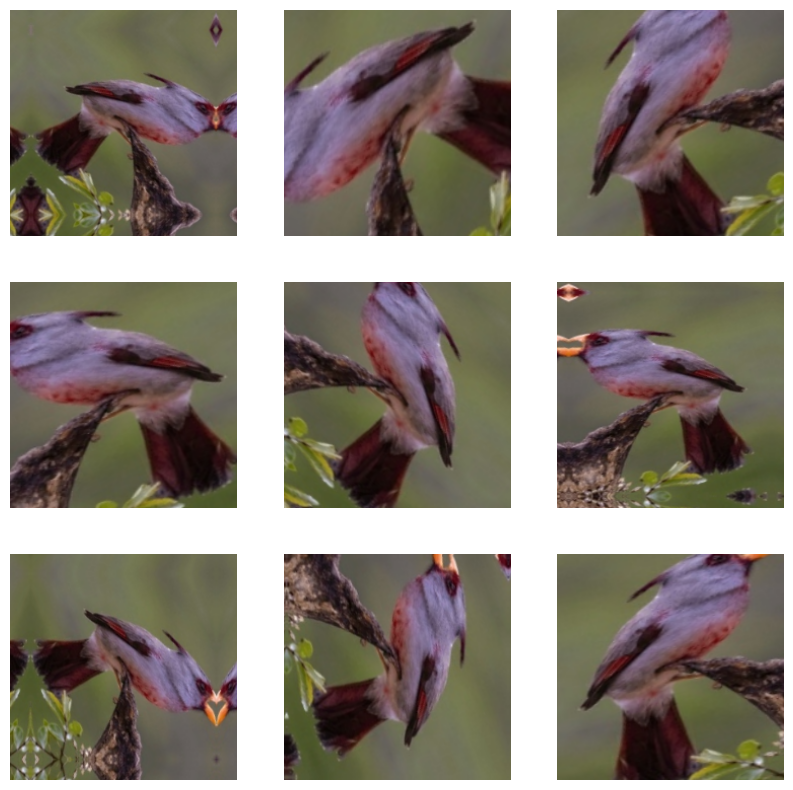

In [6]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [7]:
img_size = (224, 224)

In [8]:
inputs = keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(inputs)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dropout(0.5)(x)
outputs = layers.Dense(525, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 batch_normalization (Batch  (None, 224, 224, 3)       12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 batch_normalization_1 (Bat  (None, 111, 111, 32)      128  

In [9]:
import tensorflow as tf
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [10]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="bird525.keras",
        save_best_only=True,
        monitor="val_loss")]

In [11]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validata,
    callbacks=callbacks)

Epoch 1/20




   9/2645 [..............................] - ETA: 36:32 - loss: 6.6437 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [12]:
test_model = keras.models.load_model(
    "bird525_adam.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.9206 - loss: 0.2850
Test accuracy: 0.922


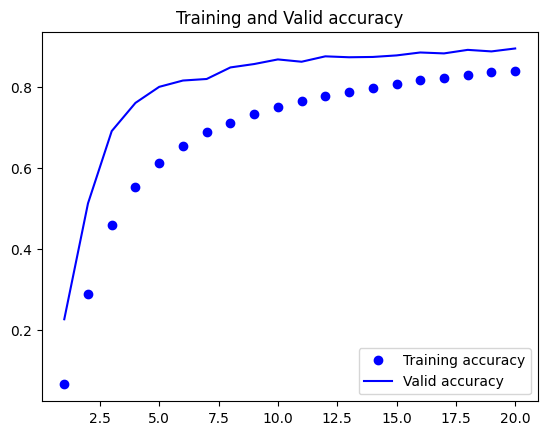

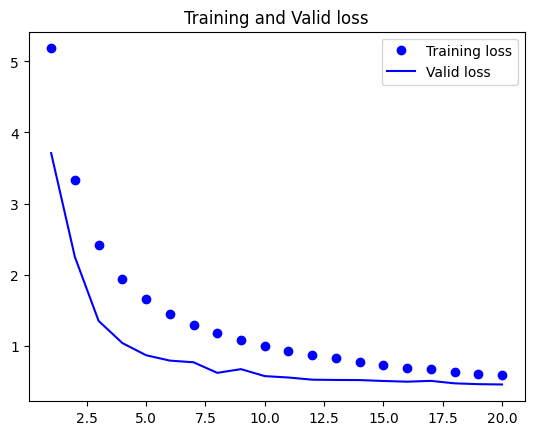

In [13]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import precision_score, roc_curve, f1_score

# Assuming you have predictions and true labels for your model
# Replace pred_y and true_y with your actual predictions and true labels
pred_y = model.predict(X_test)
true_y = y_test

# Precision
precision = precision_score(true_y, pred_y)

# F1-score
f1 = f1_score(true_y, pred_y)

# ROC Curve
fpr, tpr, thresholds = roc_curve(true_y, pred_y)

# Plotting precision
plt.figure()
plt.plot(epochs, precision, 'bo', label='Precision')
plt.title('Precision')
plt.legend()
plt.show()

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal dotted line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plotting F1-score
plt.figure()
plt.plot(epochs, f1, 'bo', label='F1-score')
plt.title('F1-score')
plt.legend()
plt.show()


NameError: name 'X_test' is not defined

In [ ]:
# pred = model.predict(test_dataset)
# pred

In [ ]:
# np.argmax(pred[0])

In [ ]:
# from tensorflow.keras.utils import load_img, img_to_array
# def results(filename, class_names):
#     img = load_img(filename,target_size=(224,224))
#     imgconv = img_to_array(img)
#     img_array = np.expand_dims(imgconv,axis=0) 
#     pred = np.argmax(model.predict(img_array))
#     predimg = class_names[pred]
#     predver = np.max(model.predict(img_array))
#     pred
#     plt.imshow(img)
#     plt.title("Eto: {}, veroyatnost : {}".format (predimg, predver))

In [ ]:
# results('/kaggle/input/100-bird-species/test/ANTBIRD/1.jpg', class_names)

In [ ]:
# results('/kaggle/input/100-bird-species/test/CASSOWARY/3.jpg', class_names)

In [ ]:
# results('/kaggle/input/100-bird-species/test/DUNLIN/4.jpg', class_names)